In [1]:
#import libraries 
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the data in pandas
df = pd.read_csv(Path('../Clean_datasets/Agg_Final_clean_table.csv'))
df

,County_of_Residence,Age,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,...,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,Description,urban,rural,suburban
0,Alameda,Less than 1 year,1,0,0,0,411,0,0,85,...,0,194,216,410,6,0,urban,1,0,0
1,Alameda,1 - 4 years,2,0,0,0,61,0,0,36,...,0,36,36,41,0,0,urban,1,0,0
2,Alameda,5 - 9 years,3,0,0,0,60,0,0,30,...,0,36,36,36,6,0,urban,1,0,0
3,Alameda,10 - 14 years,4,0,0,0,66,0,0,24,...,0,36,36,50,0,0,urban,1,0,0
4,Alameda,15 - 19 years,5,0,0,73,138,60,0,36,...,0,58,169,233,6,12,urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yuba,80 - 84 years,18,60,50,204,98,100,20,36,...,191,211,235,289,0,157,rural,0,1,0
1272,Yuba,85 - 89 years,19,60,50,155,103,73,20,36,...,209,192,179,249,0,122,rural,0,1,0
1273,Yuba,90 - 94 years,20,60,50,109,89,67,20,36,...,192,173,109,201,0,79,rural,0,1,0
1274,Yuba,95 - 99 years,21,50,10,63,60,50,0,30,...,81,66,36,73,0,36,rural,0,1,0


In [3]:
#columns list
df.columns 

Index(['County_of_Residence', 'Age', 'age_cat', 'bachelors_degree',
       'graduate_degree', 'high_school_or_GED', 'less_than_high_school',
       'some_college_credit', 'edu_unknown', 'asian', 'black_african_american',
       'hispanic', 'multi_race', 'native_american', 'other_unknown',
       'pi_native_hawaiian', 'white', 'foreign_born', 'united_states',
       'immigration_unknown', 'divorced', 'married', 'never_married',
       'marital_unknown', 'widowed', 'female', 'male', 'veteran_no',
       'veteran_unknown', 'veteran_yes', 'Description', 'urban', 'rural',
       'suburban'],
      dtype='object')

In [4]:
#keeping a reference DF for
ref_df = df[['Age','age_cat']].copy()
ref_df

,Age,age_cat
0,Less than 1 year,1
1,1 - 4 years,2
2,5 - 9 years,3
3,10 - 14 years,4
4,15 - 19 years,5
...,...,...
1271,80 - 84 years,18
1272,85 - 89 years,19
1273,90 - 94 years,20
1274,95 - 99 years,21


In [5]:
#dropping the non numerical columns after creating coded columns
df.drop(columns=['Description','County_of_Residence','Age'], inplace= True)
df.head(25)

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
0,1,0,0,0,411,0,0,85,88,117,...,0,0,194,216,410,6,0,1,0,0
1,2,0,0,0,61,0,0,36,24,36,...,0,0,36,36,41,0,0,1,0,0
2,3,0,0,0,60,0,0,30,24,36,...,0,0,36,36,36,6,0,1,0,0
3,4,0,0,0,66,0,0,24,24,36,...,0,0,36,36,50,0,0,1,0,0
4,5,0,0,73,138,60,0,36,61,68,...,0,0,58,169,233,6,12,1,0,0
5,6,64,0,197,80,138,30,61,129,132,...,6,6,91,362,444,12,30,1,0,0
6,7,73,50,185,85,151,20,74,131,136,...,12,0,121,396,502,18,30,1,0,0
7,8,95,60,198,92,161,60,82,158,117,...,24,12,177,420,571,12,36,1,0,0
8,9,97,74,253,126,161,60,105,207,162,...,36,12,252,460,697,18,30,1,0,0
9,10,139,85,286,149,200,60,136,235,185,...,24,36,335,539,849,30,36,1,0,0


In [6]:
#grouping by the data by the age category and calculating the mean of the values
df_mean = df.groupby('age_cat').mean()
df_mean

,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,multi_race,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
age_cat,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.172414,223.603448,0.000000,4.310345,22.655172,27.568966,113.982759,18.068966,...,0.827586,0.206897,99.706897,122.017241,213.500000,1.862069,0.413793,0.241379,0.465517,0.293103
2,0.000000,0.000000,0.000000,57.327586,0.000000,0.517241,6.827586,7.672414,25.310345,5.793103,...,0.206897,0.103448,25.000000,29.224138,44.189655,0.413793,0.000000,0.241379,0.465517,0.293103
3,0.000000,0.000000,0.000000,42.896552,0.000000,1.034483,6.724138,6.103448,19.189655,3.931034,...,0.000000,0.000000,19.603448,20.810345,31.103448,0.310345,0.000000,0.241379,0.465517,0.293103
4,0.000000,0.000000,0.172414,52.758621,0.000000,0.689655,7.241379,7.103448,23.517241,4.137931,...,0.000000,0.000000,21.293103,26.827586,39.051724,0.517241,0.000000,0.241379,0.465517,0.293103
5,0.517241,0.172414,52.482759,81.068966,31.551724,3.275862,12.689655,15.068966,58.793103,10.862069,...,0.206897,0.000000,37.775862,81.413793,108.258621,2.068966,2.689655,0.241379,0.465517,0.293103
6,24.362069,6.551724,109.827586,60.017241,84.810345,7.241379,19.517241,28.931034,103.344828,13.137931,...,1.551724,1.448276,56.965517,163.465517,203.189655,4.344828,13.913793,0.241379,0.465517,0.293103
7,41.431034,20.448276,121.327586,70.137931,88.655172,10.862069,21.086207,35.206897,110.965517,15.103448,...,4.448276,2.586207,71.586207,193.120690,244.327586,5.982759,19.086207,0.241379,0.465517,0.293103
8,47.362069,25.293103,124.896552,75.706897,94.206897,17.086207,26.051724,37.758621,111.051724,14.844828,...,9.310345,5.793103,90.465517,198.051724,265.913793,7.344828,19.603448,0.241379,0.465517,0.293103
9,53.568966,31.827586,140.155172,90.465517,101.000000,21.465517,31.258621,44.189655,130.793103,14.689655,...,10.086207,9.724138,115.586207,223.724138,318.275862,9.224138,21.534483,0.241379,0.465517,0.293103


<AxesSubplot:ylabel='age_cat'>

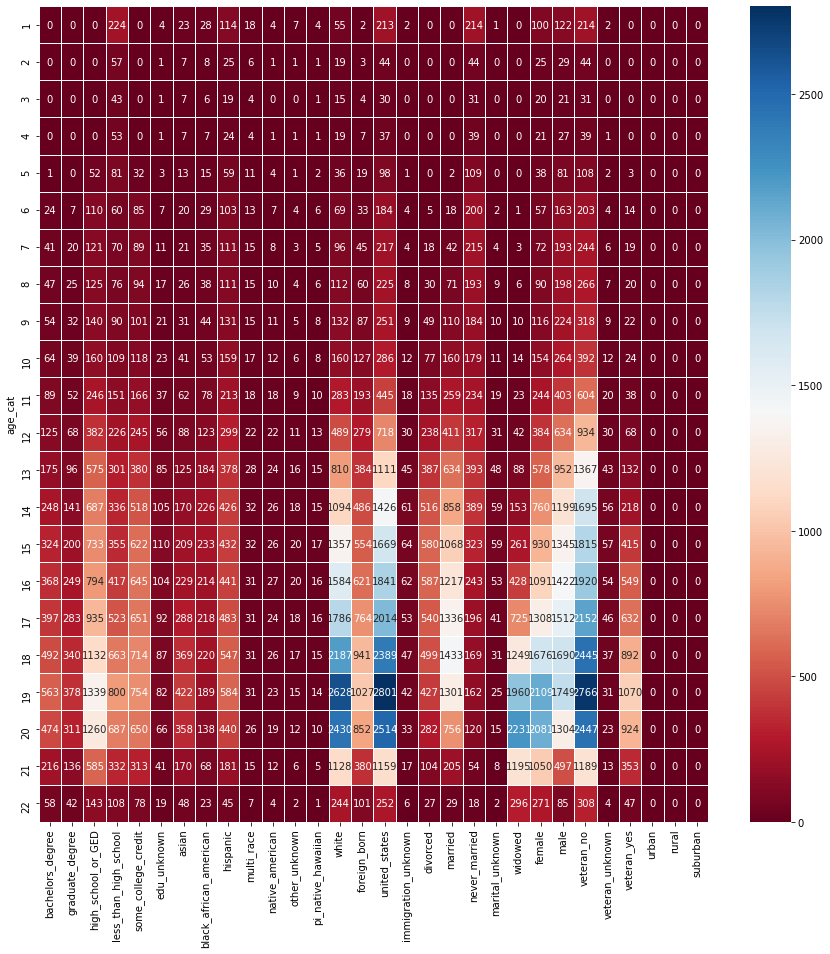

In [7]:
#Creating correlactiong heat map for age categories 
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(df_mean, annot=True, linewidths=.5, cmap='RdBu', ax=ax, fmt='.0f', linewidth = 1)

In [8]:
#scaling the mean df
scaled_mean = StandardScaler().fit_transform(df_mean)
scaled_mean_df = pd.DataFrame(scaled_mean, columns=df_mean.columns)
scaled_mean_df

,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,multi_race,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
0,-0.947136,-0.895645,-1.008602,-0.170410,-1.053036,-1.027124,-0.778613,-0.847221,-0.693882,-0.109312,...,-0.925491,-0.607518,-0.746756,-0.856994,-0.840043,-0.967804,-0.728883,1.0,1.0,0.0
1,-0.947136,-0.895645,-1.009004,-0.909243,-1.053036,-1.124846,-0.899919,-1.083293,-1.174403,-1.397703,...,-0.956253,-0.607677,-0.858549,-1.010049,-1.026247,-1.042007,-0.730105,1.0,1.0,0.0
2,-0.947136,-0.895645,-1.009004,-0.973366,-1.053036,-1.111520,-0.900712,-1.101909,-1.207572,-1.593133,...,-0.966507,-0.607836,-0.866624,-1.023927,-1.040639,-1.047307,-0.730105,1.0,1.0,0.0
3,-0.947136,-0.895645,-1.008602,-0.929545,-1.053036,-1.120404,-0.896748,-1.090044,-1.184120,-1.571418,...,-0.966507,-0.607836,-0.864096,-1.014002,-1.031897,-1.036707,-0.730105,1.0,1.0,0.0
4,-0.944269,-0.894241,-0.886623,-0.803750,-0.936153,-1.053776,-0.854991,-0.995533,-0.992958,-0.865699,...,-0.956253,-0.607836,-0.839431,-0.923966,-0.955785,-0.957204,-0.722163,1.0,1.0,0.0
5,-0.812104,-0.842271,-0.752905,-0.897292,-0.738857,-0.951612,-0.802663,-0.831060,-0.751530,-0.626840,...,-0.889603,-0.605606,-0.810715,-0.788628,-0.851382,-0.840600,-0.689019,1.0,1.0,0.0
6,-0.717495,-0.729062,-0.726089,-0.852321,-0.724614,-0.858333,-0.790638,-0.756597,-0.710233,-0.420553,...,-0.746048,-0.603854,-0.788836,-0.739714,-0.806139,-0.756681,-0.673746,1.0,1.0,0.0
7,-0.684621,-0.689593,-0.717767,-0.827576,-0.704048,-0.697981,-0.752581,-0.726321,-0.709765,-0.447696,...,-0.505082,-0.598915,-0.760585,-0.731580,-0.782399,-0.686895,-0.672218,1.0,1.0,0.0
8,-0.650218,-0.636359,-0.682187,-0.761997,-0.678883,-0.585157,-0.712675,-0.650017,-0.602786,-0.463982,...,-0.466630,-0.592862,-0.722993,-0.689236,-0.724812,-0.590608,-0.666516,1.0,1.0,0.0
9,-0.594217,-0.579755,-0.635229,-0.680407,-0.614693,-0.557618,-0.634579,-0.551210,-0.451052,-0.221504,...,-0.440140,-0.586808,-0.665613,-0.622036,-0.644244,-0.469588,-0.658319,1.0,1.0,0.0


<AxesSubplot:>

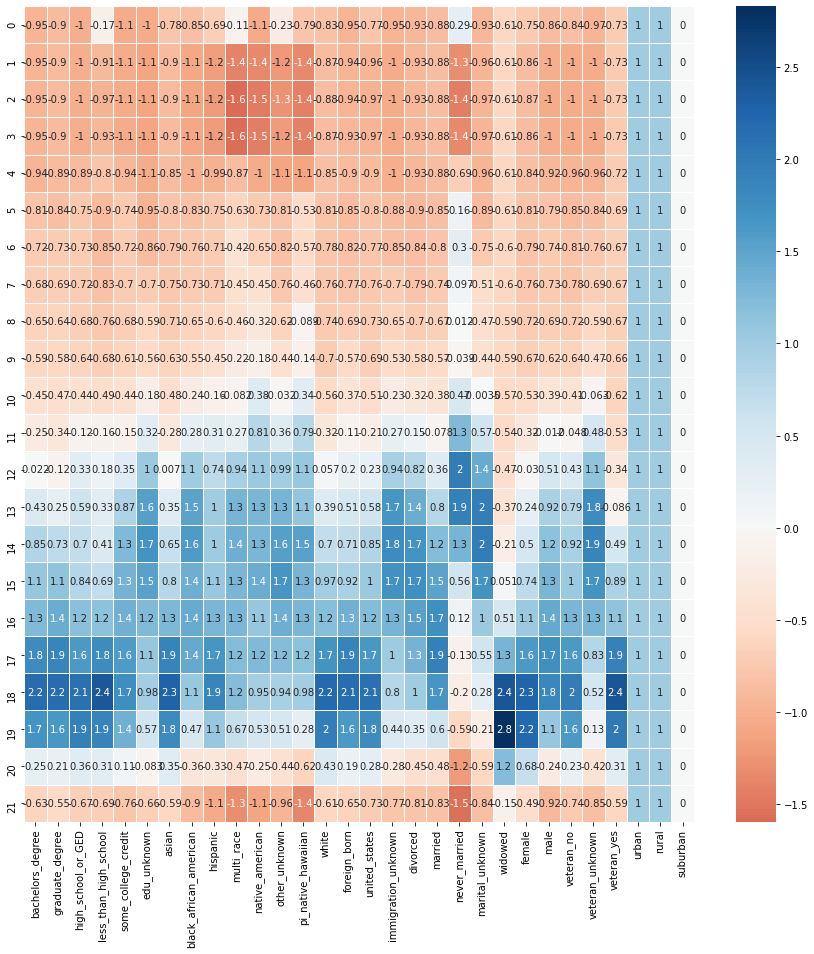

In [9]:
#plotting for the scaled df
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(scaled_mean_df, annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1,center=0)

In [10]:
#grouping by age for median 
df_median = df.groupby('age_cat').median()
df_median

,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,multi_race,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
age_cat,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,67.5,0.0,0.0,9.0,6.0,36.0,12.0,...,0.0,0.0,36.0,36.0,55.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,18.0,0.0,...,0.0,0.0,18.0,24.0,30.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,18.0,18.0,24.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,18.0,0.0,...,0.0,0.0,18.0,24.0,33.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,50.0,60.0,30.0,0.0,6.0,3.0,30.0,6.0,...,0.0,0.0,30.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0
6,20.0,0.0,60.0,50.0,60.0,0.0,6.0,9.0,36.0,9.0,...,0.0,0.0,36.0,41.0,47.5,0.0,6.0,0.0,0.0,0.0
7,35.0,10.0,60.0,55.0,60.0,0.0,6.0,6.0,36.0,12.0,...,0.0,0.0,36.0,49.5,65.5,0.0,12.0,0.0,0.0,0.0
8,40.0,15.0,60.0,60.0,60.0,10.0,18.0,15.0,36.0,12.0,...,6.0,0.0,36.0,46.5,65.0,0.0,15.0,0.0,0.0,0.0
9,40.0,20.0,60.0,60.0,60.0,10.0,12.0,18.0,36.0,12.0,...,6.0,6.0,36.0,72.5,112.5,0.0,18.0,0.0,0.0,0.0


<AxesSubplot:ylabel='age_cat'>

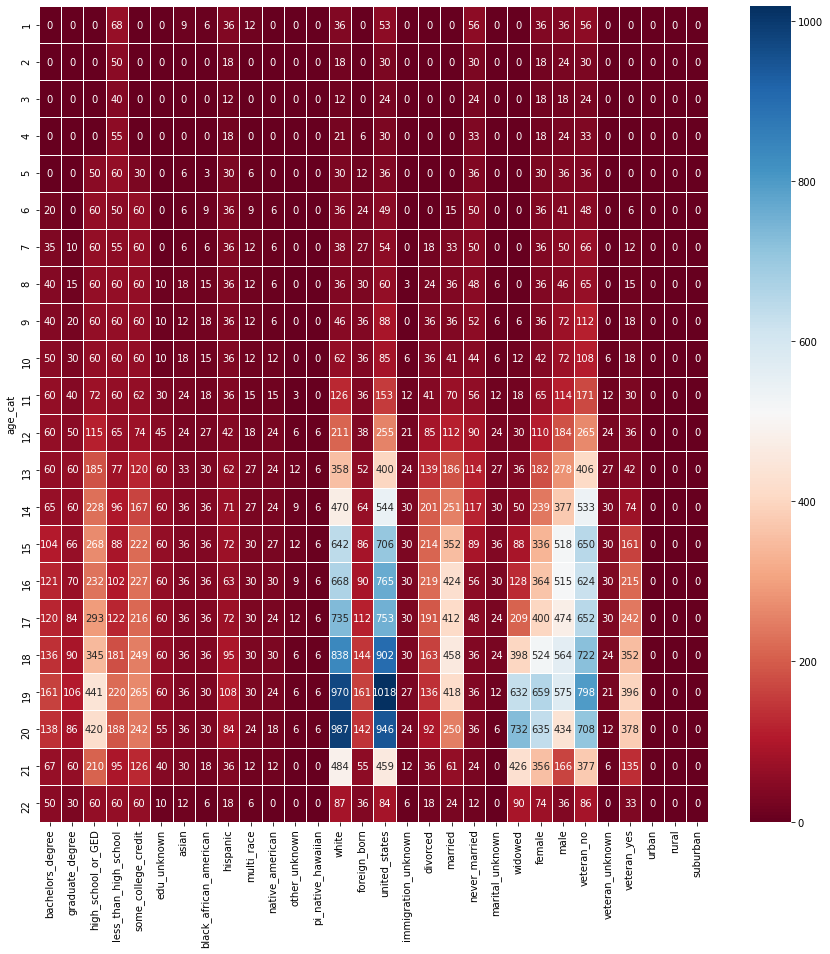

In [11]:
#heatmap for median(looks the same as mean)
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(df_median, annot=True, linewidths=.5, cmap='RdBu', ax=ax, fmt='.0f', linewidth = 1)

In [12]:
#scaling the median df
scaled_median = StandardScaler().fit_transform(df_mean)
scaled_median_df = pd.DataFrame(scaled_median, columns=df_median.columns)
scaled_median_df

,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,multi_race,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
0,-0.947136,-0.895645,-1.008602,-0.170410,-1.053036,-1.027124,-0.778613,-0.847221,-0.693882,-0.109312,...,-0.925491,-0.607518,-0.746756,-0.856994,-0.840043,-0.967804,-0.728883,1.0,1.0,0.0
1,-0.947136,-0.895645,-1.009004,-0.909243,-1.053036,-1.124846,-0.899919,-1.083293,-1.174403,-1.397703,...,-0.956253,-0.607677,-0.858549,-1.010049,-1.026247,-1.042007,-0.730105,1.0,1.0,0.0
2,-0.947136,-0.895645,-1.009004,-0.973366,-1.053036,-1.111520,-0.900712,-1.101909,-1.207572,-1.593133,...,-0.966507,-0.607836,-0.866624,-1.023927,-1.040639,-1.047307,-0.730105,1.0,1.0,0.0
3,-0.947136,-0.895645,-1.008602,-0.929545,-1.053036,-1.120404,-0.896748,-1.090044,-1.184120,-1.571418,...,-0.966507,-0.607836,-0.864096,-1.014002,-1.031897,-1.036707,-0.730105,1.0,1.0,0.0
4,-0.944269,-0.894241,-0.886623,-0.803750,-0.936153,-1.053776,-0.854991,-0.995533,-0.992958,-0.865699,...,-0.956253,-0.607836,-0.839431,-0.923966,-0.955785,-0.957204,-0.722163,1.0,1.0,0.0
5,-0.812104,-0.842271,-0.752905,-0.897292,-0.738857,-0.951612,-0.802663,-0.831060,-0.751530,-0.626840,...,-0.889603,-0.605606,-0.810715,-0.788628,-0.851382,-0.840600,-0.689019,1.0,1.0,0.0
6,-0.717495,-0.729062,-0.726089,-0.852321,-0.724614,-0.858333,-0.790638,-0.756597,-0.710233,-0.420553,...,-0.746048,-0.603854,-0.788836,-0.739714,-0.806139,-0.756681,-0.673746,1.0,1.0,0.0
7,-0.684621,-0.689593,-0.717767,-0.827576,-0.704048,-0.697981,-0.752581,-0.726321,-0.709765,-0.447696,...,-0.505082,-0.598915,-0.760585,-0.731580,-0.782399,-0.686895,-0.672218,1.0,1.0,0.0
8,-0.650218,-0.636359,-0.682187,-0.761997,-0.678883,-0.585157,-0.712675,-0.650017,-0.602786,-0.463982,...,-0.466630,-0.592862,-0.722993,-0.689236,-0.724812,-0.590608,-0.666516,1.0,1.0,0.0
9,-0.594217,-0.579755,-0.635229,-0.680407,-0.614693,-0.557618,-0.634579,-0.551210,-0.451052,-0.221504,...,-0.440140,-0.586808,-0.665613,-0.622036,-0.644244,-0.469588,-0.658319,1.0,1.0,0.0


<AxesSubplot:>

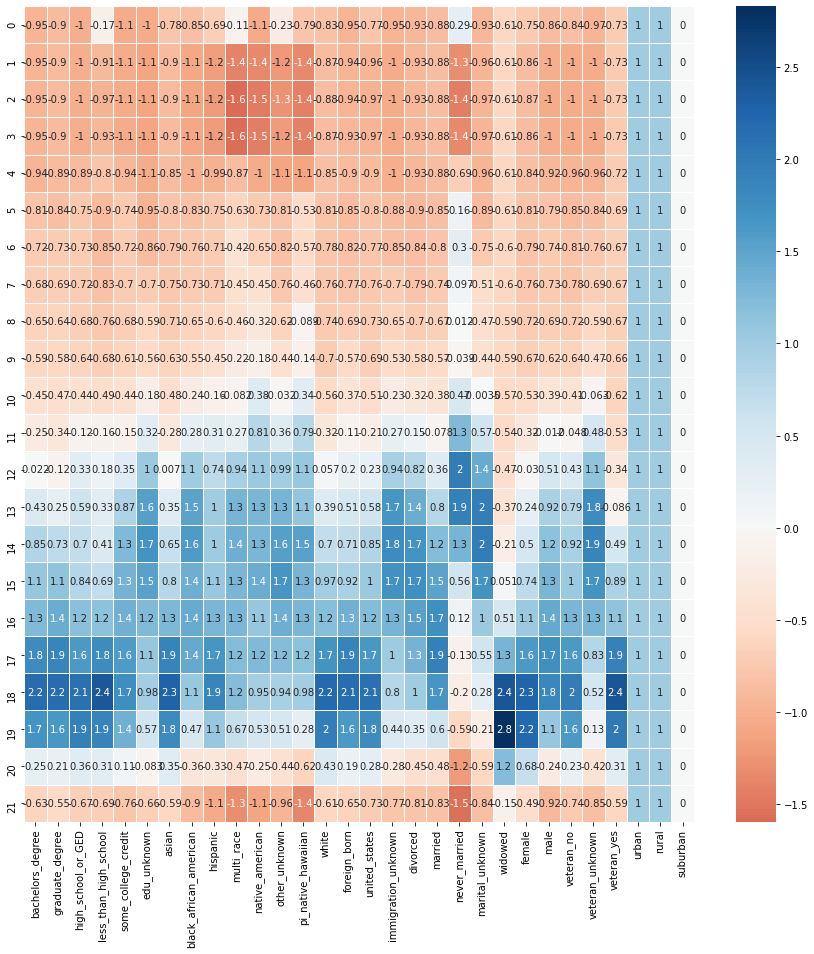

In [13]:
#plotting for the scaled df
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(scaled_median_df, annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1,center=0)

In [14]:
#creating the correlation table for the original DF
df.corr()

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
age_cat,1.000000e+00,0.264969,0.273849,0.268262,0.198734,0.268787,0.224020,0.203158,0.130321,0.147898,...,0.152825,0.277639,0.267954,0.226827,0.236358,0.167394,0.299539,4.909904e-17,-2.969379e-17,-4.121680e-17
bachelors_degree,2.649691e-01,1.000000,0.993427,0.975117,0.934559,0.971023,0.859853,0.948610,0.832946,0.897047,...,0.733985,0.854347,0.973732,0.965389,0.976980,0.780721,0.944189,3.898435e-01,-2.527870e-01,-8.947812e-02
graduate_degree,2.738490e-01,0.993427,1.000000,0.959792,0.921113,0.952093,0.829199,0.944877,0.798417,0.867806,...,0.691829,0.864496,0.967957,0.944577,0.958063,0.743177,0.954608,3.714577e-01,-2.438849e-01,-8.194895e-02
high_school_or_GED,2.682617e-01,0.975117,0.959792,1.000000,0.966979,0.980828,0.865528,0.925243,0.856437,0.926730,...,0.732713,0.879809,0.988726,0.972493,0.990713,0.768424,0.947470,4.069415e-01,-2.695651e-01,-8.716593e-02
less_than_high_school,1.987340e-01,0.934559,0.921113,0.966979,1.000000,0.931071,0.864114,0.926188,0.881495,0.956984,...,0.730020,0.859129,0.966121,0.948569,0.974277,0.768037,0.897373,3.747303e-01,-2.491433e-01,-7.926323e-02
some_college_credit,2.687868e-01,0.971023,0.952093,0.980828,0.931071,1.000000,0.901106,0.890487,0.869299,0.925396,...,0.797079,0.791512,0.952771,0.989254,0.983733,0.823532,0.920659,4.290264e-01,-2.865106e-01,-8.935848e-02
edu_unknown,2.240202e-01,0.859853,0.829199,0.865528,0.864114,0.901106,1.000000,0.816611,0.948229,0.930098,...,0.961638,0.583709,0.817376,0.933501,0.909683,0.971025,0.724227,3.366313e-01,-2.372220e-01,-5.651010e-02
asian,2.031578e-01,0.948610,0.944877,0.925243,0.926188,0.890487,0.816611,1.000000,0.827089,0.866417,...,0.681489,0.846761,0.939101,0.905323,0.937776,0.727758,0.868574,3.875412e-01,-2.245678e-01,-1.182375e-01
black_african_american,1.303206e-01,0.832946,0.798417,0.856437,0.881495,0.869299,0.948229,0.827089,1.000000,0.944596,...,0.904442,0.589246,0.809801,0.913996,0.901555,0.906313,0.694258,3.461182e-01,-2.071787e-01,-9.835145e-02
hispanic,1.478977e-01,0.897047,0.867806,0.926730,0.956984,0.925396,0.930098,0.866417,0.944596,1.000000,...,0.850639,0.704915,0.891855,0.961257,0.958926,0.872217,0.795015,3.728784e-01,-2.410887e-01,-8.634874e-02


<AxesSubplot:>

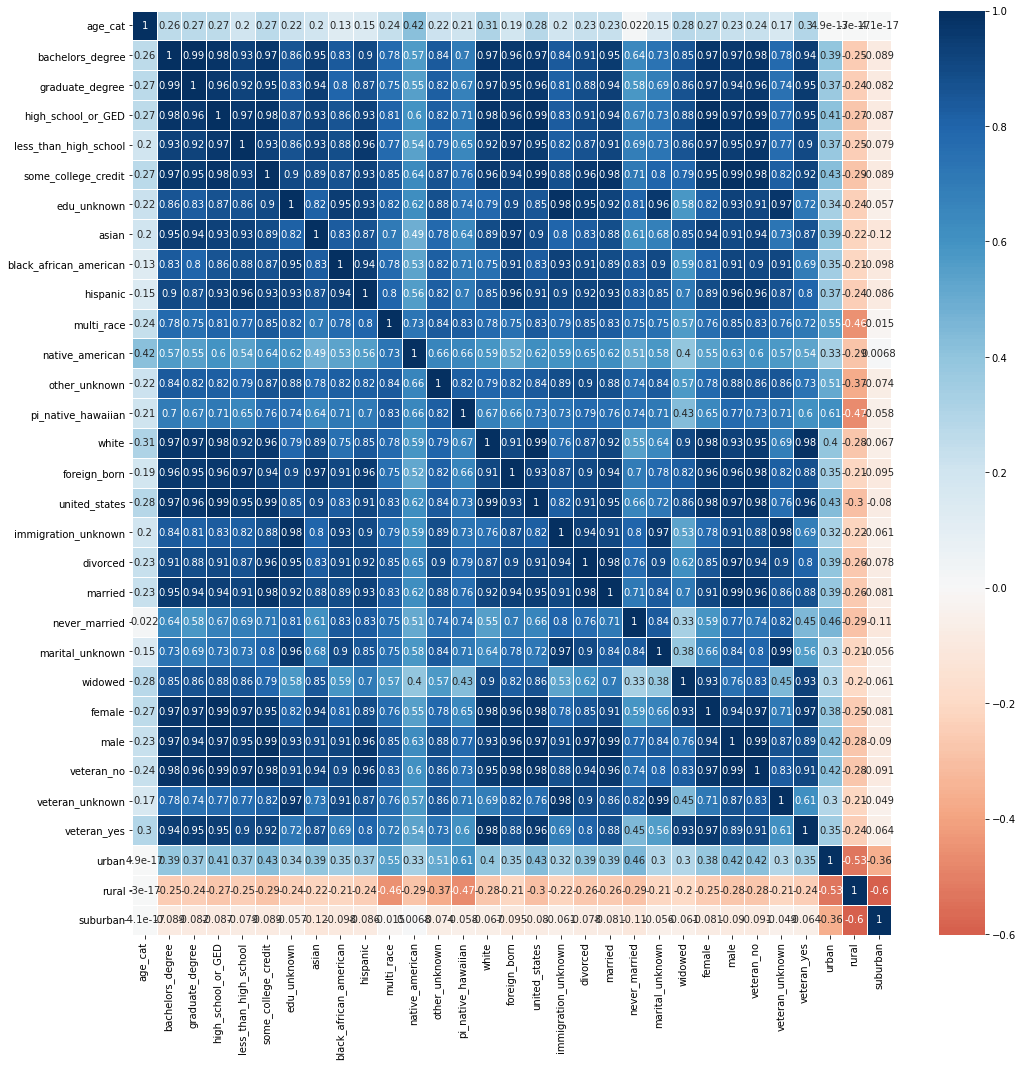

In [15]:
#creating heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(17,17))         
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1, center = 0)

In [16]:
#scalling the data 
scaled = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
0,-1.655032,-0.328162,-0.324682,-0.347826,0.185516,-0.376187,-0.367392,-0.080842,-0.026429,-0.147380,...,-0.297694,-0.240847,-0.210010,-0.228855,-0.193350,-0.218638,-0.310094,1.772811,-0.933257,-0.643921
1,-1.497410,-0.328162,-0.324682,-0.347826,-0.250126,-0.376187,-0.367392,-0.181776,-0.180563,-0.242862,...,-0.297694,-0.240847,-0.291994,-0.325648,-0.319108,-0.307565,-0.310094,1.772811,-0.933257,-0.643921
2,-1.339788,-0.328162,-0.324682,-0.347826,-0.251371,-0.376187,-0.367392,-0.194135,-0.180563,-0.242862,...,-0.297694,-0.240847,-0.291994,-0.325648,-0.320812,-0.218638,-0.310094,1.772811,-0.933257,-0.643921
3,-1.182166,-0.328162,-0.324682,-0.347826,-0.243903,-0.376187,-0.367392,-0.206495,-0.180563,-0.242862,...,-0.297694,-0.240847,-0.291994,-0.325648,-0.316041,-0.307565,-0.310094,1.772811,-0.933257,-0.643921
4,-1.024544,-0.328162,-0.324682,-0.289147,-0.154285,-0.296784,-0.367392,-0.181776,-0.091455,-0.205141,...,-0.297694,-0.240847,-0.280579,-0.254128,-0.253673,-0.218638,-0.295044,1.772811,-0.933257,-0.643921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1.024544,-0.212936,-0.177020,-0.183845,-0.204073,-0.243848,-0.201071,-0.181776,-0.151663,-0.242862,...,-0.297694,-0.124302,-0.201189,-0.218638,-0.234588,-0.307565,-0.113190,-0.564076,1.071517,-0.643921
1272,1.182166,-0.212936,-0.177020,-0.223232,-0.197849,-0.279579,-0.201071,-0.181776,-0.166113,-0.242862,...,-0.206104,-0.113319,-0.211048,-0.248751,-0.248220,-0.307565,-0.157086,-0.564076,1.071517,-0.643921
1273,1.339788,-0.212936,-0.177020,-0.260209,-0.215275,-0.287520,-0.201071,-0.181776,-0.166113,-0.242862,...,-0.297694,-0.123692,-0.220907,-0.286393,-0.264579,-0.307565,-0.211015,-0.564076,1.071517,-0.643921
1274,1.497410,-0.232140,-0.295150,-0.297185,-0.251371,-0.310018,-0.367392,-0.194135,-0.195013,-0.257007,...,-0.297694,-0.191422,-0.276427,-0.325648,-0.308202,-0.307565,-0.264944,-0.564076,1.071517,-0.643921


In [17]:
#crating correlation for scaled data
scaled_df.corr()

,age_cat,bachelors_degree,graduate_degree,high_school_or_GED,less_than_high_school,some_college_credit,edu_unknown,asian,black_african_american,hispanic,...,marital_unknown,widowed,female,male,veteran_no,veteran_unknown,veteran_yes,urban,rural,suburban
age_cat,1.000000e+00,0.264969,0.273849,0.268262,0.198734,0.268787,0.224020,0.203158,0.130321,0.147898,...,0.152825,0.277639,0.267954,0.226827,0.236358,0.167394,0.299539,7.656711e-18,3.480323e-19,-3.132291e-18
bachelors_degree,2.649691e-01,1.000000,0.993427,0.975117,0.934559,0.971023,0.859853,0.948610,0.832946,0.897047,...,0.733985,0.854347,0.973732,0.965389,0.976980,0.780721,0.944189,3.898435e-01,-2.527870e-01,-8.947812e-02
graduate_degree,2.738490e-01,0.993427,1.000000,0.959792,0.921113,0.952093,0.829199,0.944877,0.798417,0.867806,...,0.691829,0.864496,0.967957,0.944577,0.958063,0.743177,0.954608,3.714577e-01,-2.438849e-01,-8.194895e-02
high_school_or_GED,2.682617e-01,0.975117,0.959792,1.000000,0.966979,0.980828,0.865528,0.925243,0.856437,0.926730,...,0.732713,0.879809,0.988726,0.972493,0.990713,0.768424,0.947470,4.069415e-01,-2.695651e-01,-8.716593e-02
less_than_high_school,1.987340e-01,0.934559,0.921113,0.966979,1.000000,0.931071,0.864114,0.926188,0.881495,0.956984,...,0.730020,0.859129,0.966121,0.948569,0.974277,0.768037,0.897373,3.747303e-01,-2.491433e-01,-7.926323e-02
some_college_credit,2.687868e-01,0.971023,0.952093,0.980828,0.931071,1.000000,0.901106,0.890487,0.869299,0.925396,...,0.797079,0.791512,0.952771,0.989254,0.983733,0.823532,0.920659,4.290264e-01,-2.865106e-01,-8.935848e-02
edu_unknown,2.240202e-01,0.859853,0.829199,0.865528,0.864114,0.901106,1.000000,0.816611,0.948229,0.930098,...,0.961638,0.583709,0.817376,0.933501,0.909683,0.971025,0.724227,3.366313e-01,-2.372220e-01,-5.651010e-02
asian,2.031578e-01,0.948610,0.944877,0.925243,0.926188,0.890487,0.816611,1.000000,0.827089,0.866417,...,0.681489,0.846761,0.939101,0.905323,0.937776,0.727758,0.868574,3.875412e-01,-2.245678e-01,-1.182375e-01
black_african_american,1.303206e-01,0.832946,0.798417,0.856437,0.881495,0.869299,0.948229,0.827089,1.000000,0.944596,...,0.904442,0.589246,0.809801,0.913996,0.901555,0.906313,0.694258,3.461182e-01,-2.071787e-01,-9.835145e-02
hispanic,1.478977e-01,0.897047,0.867806,0.926730,0.956984,0.925396,0.930098,0.866417,0.944596,1.000000,...,0.850639,0.704915,0.891855,0.961257,0.958926,0.872217,0.795015,3.728784e-01,-2.410887e-01,-8.634874e-02


<AxesSubplot:>

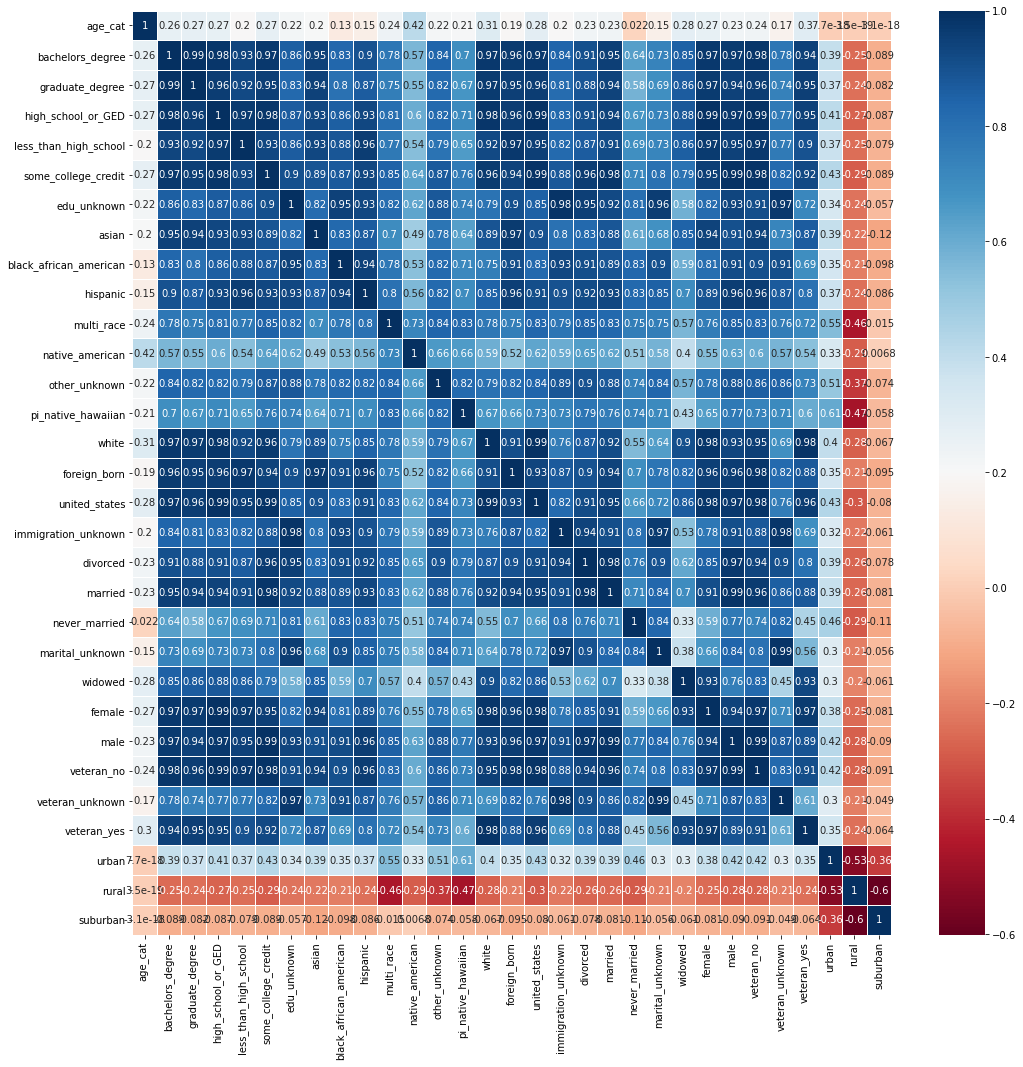

In [18]:
#plotting Heatmap for scaled table 
fig, ax = plt.subplots(figsize=(17,17))         
sns.heatmap(scaled_df.corr(), annot=True, linewidths=.5, cmap='RdBu', ax=ax, linewidth = 1)
